# 4.9: Intro to Data Visualization with Python

## 1. Creating a Bar Chart

## 2. Creating a Histogram

## 3. Creating a Scatter Plot

## 4. Creating a Line Chart

Creating a Sampling Data

## 1. Creating a bar chart

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\azikb\Downloads\Data Immersion. Assiginment 4. Python. Instacart Basket Analysis"

In [7]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_grouped.pkl'))

In [56]:
ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,avg_price,Spending_flag,days_since_prior_order_median,Frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,both,Mid-range product,Regulary days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer


<Axes: xlabel='order_day_of_week'>

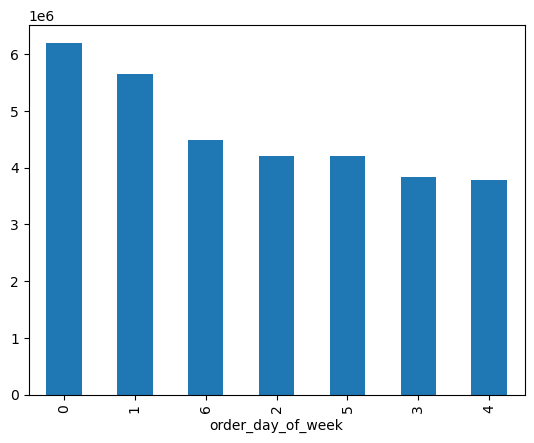

In [16]:
# Creating a bar chart from largest to smallest.
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='order_day_of_week'>

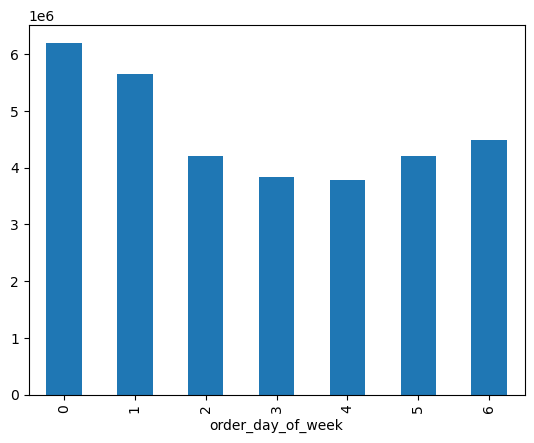

In [18]:
# Creating a bar chart sorted by index order
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

##### We can use sort_index function to sort by index any columns...

In [19]:
ords_prods_merge['order_day_of_week'].value_counts()

order_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [20]:
ords_prods_merge['order_day_of_week'].value_counts().sort_index()

order_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

##### Making a bar chart colorful

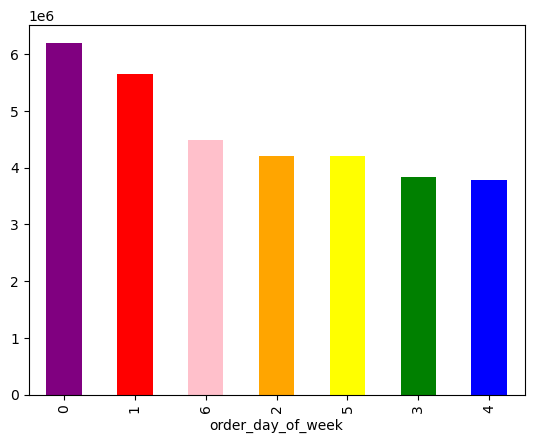

In [21]:
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

##### Export bar chart from Jupiter

In [24]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## 2. Creating a Histogram

<Axes: ylabel='Frequency'>

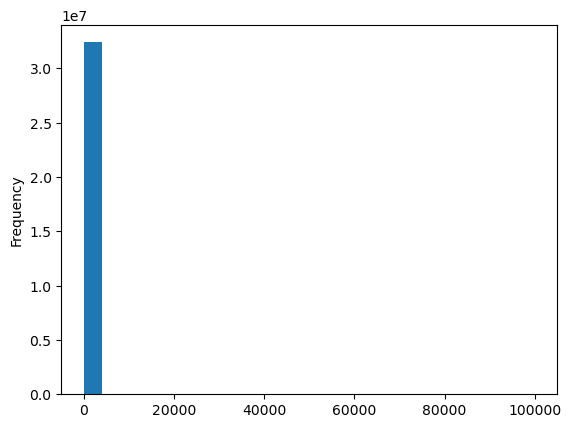

In [25]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [27]:
# doing some statistics
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [28]:
ords_prods_merge['prices'].max()

99999.0

In [31]:
ords_prods_merge['prices'].median()

7.4

In [30]:
ords_prods_merge['prices'].mean()

11.980225638383454

## 3. Creating Scatter Plot

<Axes: xlabel='prices', ylabel='prices'>

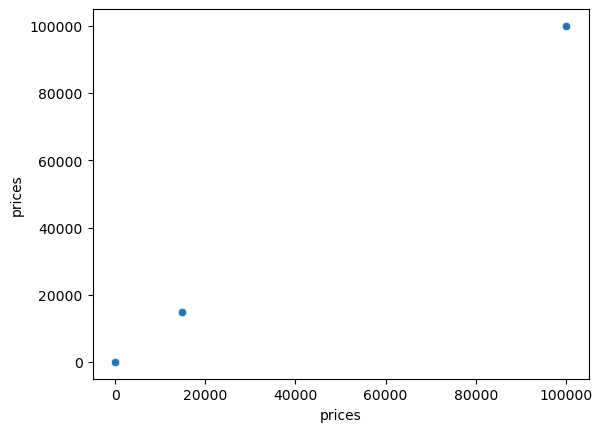

In [32]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

##### Finding an outlier

In [64]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,avg_price,Spending_flag,days_since_prior_order_median,Frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regulary days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent Customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regulary days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent Customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regulary days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,99999.0,High-range product,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent Customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,99999.0,High-range product,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent Customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,99999.0,High-range product,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent Customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,99999.0,High-range product,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [59]:
ords_prods_merge['prices'] = ords_prods_merge['prices'].astype('float64')

In [63]:
ords_prods_merge.drop(columns=['_merge'], inplace = True)

#### Let's mark outliers as missing data, using 'np.nan' - a function in NumPy


In [65]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [67]:
# Checking the max value
ords_prods_merge['prices'].max()

25.0

#### After wrangling Data, let's create a Histogram

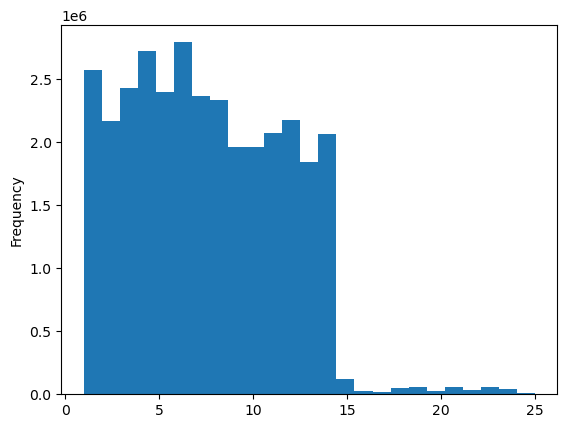

In [73]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

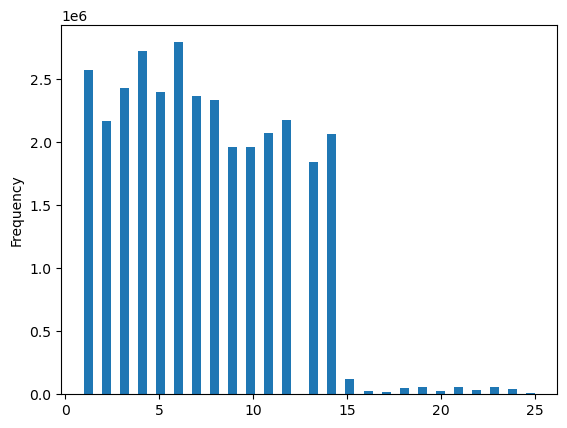

In [74]:
hist2 = ords_prods_merge['prices'].plot.hist(bins = 50)

#### Exporting Histogram from Jupiter

In [75]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist2_prices.png'))

In [76]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

## 4. Creating a Line Chart

In [77]:
df = ords_prods_merge[:2000000]

#### Before creating the Line Chart, we need Sampling Data

In [79]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [80]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [81]:
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [82]:
len(ords_prods_merge)

32404859

In [83]:
len(big)+len(small)

32404859

In [85]:
# Let's output only two columns of the new dataframe
df_2 = small[['order_day_of_week','prices']]

C:\Users\azikb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\azikb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


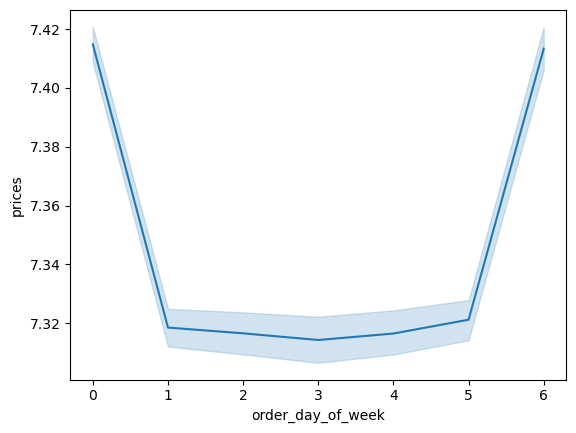

In [87]:
# Executing the Line Chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')